# 查看数据的数量及格式

In [ ]:
import dask.dataframe as dd 
#读取 CSV 文件
data = dd.read_csv(r"D:\1文件\office\od_all_daily.csv")
#获取行数（这是一个延迟操作，不会立即加载数据）
num_rows = data.shape[0]
#num_rows是一个Dask Scalar对象，要获取具体的行数，需要调用.compute()
num_rows_value = num_rows.compute()

print(f"The CSV file has {num_rows_value} rows.") #数量
print(data.head(5)) #格式


The CSV file has 11172036 rows.
    date_dt  time   o_grid   d_grid  num_freq  num_freq_total
0  20250315     0  ww07n58  ww07vpz         1               3
1  20250315     0  ww0gee4  ww0ggc1         1               2
2  20250315     0  ww0ggbd  ww0ggkr         1               2
3  20250315     0  ww0ggkr  ww0ggtp         1               3
4  20250315     0  ww0gsj6  ww0gstw         1               3


# 查看某一列数值分类及个数

In [2]:
# 要查看的列名
column_name = 'date_dt'
#使用 value_counts 方法统计每个值的个数
#dask 的 value_counts 默认是并行的，但结果是一个延迟计算的对象
value_counts = data[column_name].value_counts()
#如果需要立即看到结果，可以调用 compute 方法
value_counts_computed = value_counts.compute()

#打印结果
print(value_counts_computed)

date_dt
20250315    11172036
20250312    10432779
Name: count, dtype: int64


# 时间段分割

In [ ]:
import dask.dataframe as dd 
#读取 CSV 文件
data = dd.read_csv(r"D:\1文件\office\od_all_daily.csv")
import os
#定义筛选条件
#morning_mask = (data['time'] >= 7) & (data['time'] < 10) # 早高峰
#evening_mask = (data['time'] >= 17) & (data['time'] < 20) # 晚高峰
time1_mask = (data['date_dt'] == 20250312)  # 14日
#time2_mask = (data['date_dt'] == 20191211)  # 11日

#根据筛选条件提取数据
#morning_data = data[morning_mask] 
time1_data = data[time1_mask]
#time2_data = data[time2_mask]

#将结果保存到csv文件
#morning_data.to_csv('D:/新建文件夹/手机信令数据处理/过程文件/早高峰.csv', index=False, single_file=True)
#evening_data.to_csv('D:/新建文件夹/手机信令数据处理/过程文件/晚高峰.csv', index=False, single_file=True)
time1_data.to_csv('D:/新建文件夹/3月12日.csv', index=False, single_file=True)
#time2_data.to_csv('D:/新建文件夹/手机信令数据处理/过程文件/11日.csv', index=False, single_file=True)

#如果路径不存在，则创建路径
#if not os.path.exists('D:/新建文件夹/手机信令数据处理/过程文件'):
#   os.makedirs('D:/新建文件夹/手机信令数据处理/过程文件')
    
print("数据提取并保存完成。")

数据提取并保存完成。


# 对特征日11和14日可再次分割时间

In [3]:
import dask.dataframe as dd 
df1 = dd.read_csv('D:/新建文件夹/3月12日.csv')
#df2 = dd.read_csv('D:/新建文件夹/手机信令数据处理/过程文件/14日.csv')

#提取特征日的早高峰、晚高峰数据
morning_11 = (df1['time'] == 14)  # 早高峰
#evening_11 = (df1['time'] >= 17) & (df1['time'] < 20) # 晚高峰
df1_morning = df1[morning_11]
#df1_evening = df1[evening_11]

#morning_14 = (df2['time'] >= 7) & (df2['time'] < 10) # 早高峰
#evening_14 = (df2['time'] >= 17) & (df2['time'] < 20) # 晚高峰
#df2_morning = df2[morning_14]
#df2_evening = df2[evening_14]

#合并早高峰和晚高峰数据
#df_11 = dd.concat([df1_morning, df1_evening])
#df_14 = dd.concat([df2_morning, df2_evening])

#合并两个特征日的早高峰和晚高峰数据
#df_peak = dd.concat([df_11, df_14])

#保存早高峰和晚高峰数据为新的CSV文件

df1_morning.to_csv('D:/新建文件夹/3月12日14时.csv', index=False, single_file=True)
#df_14.to_csv('D:/新建文件夹/手机信令数据处理/过程文件/14日_早晚高峰.csv', index=False, single_file=True)

['D:\\新建文件夹\\3月12日14时.csv']

# 将出行OD匹配到格网

## 创建渔网(需要arcpy环境)

In [ ]:
import arcpy
import os

#设置工作环境
arcpy.env.workspace = r"D:\手机信令数据处理"  #工作目录

# 允许覆盖输出
arcpy.env.overwriteOutput = True

# 输入参数
input_shp = r"D:\新建文件夹\手机信令数据处理\原始数据\郑州市四环边界线.shp" #输入的边界SHP文件
output_fishnet = r"D:\新建文件夹\手机信令数据处理\过程文件\郑州市渔网.shp"  #输出的渔网文件
clipped_fishnet = r"D:\新建文件夹\手机信令数据处理\过程文件\郑州市裁剪渔网.shp"  #输出的裁剪后的渔网文件
# 定义坐标系
wgs84_geographic = arcpy.SpatialReference(4326)  # WGS 1984地理坐标系
web_mercator = arcpy.SpatialReference(3857)      # WGS 1984 Web Mercator

cell_width = 100  #网格宽度（单位：米）
cell_height = 100  #网格高度（单位：米）

# 输出路径不存在时创建
output_dir = os.path.dirname(output_fishnet)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

temp_projected = r"temp_projected.shp"
print("投影到WGS 1984 Web Mercator...")
arcpy.management.Project(
    in_dataset=input_shp,
    out_dataset=temp_projected,
    out_coor_system=web_mercator
)

#获取输入要素的范围
desc = arcpy.Describe(temp_projected)
extent = desc.extent
    
#设置渔网的原点（左下角）
origin_coord = f"{extent.XMin} {extent.YMin}"
    
#设置Y轴坐标（用于确定渔网方向）
y_axis_coord = f"{extent.XMin} {extent.YMin + 10}"
    
#设置渔网的对角坐标（右上角）
corner_coord = f"{extent.XMax} {extent.YMax}"
    
print(f"输入要素范围: {extent.XMin}, {extent.YMin}, {extent.XMax}, {extent.YMax}")
print(f"网格大小: {cell_width} x {cell_height}")
#查看shp文件坐标系
prj = arcpy.Describe(temp_projected).spatialReference
print(f"输入要素坐标系: {prj.name}")
#创建渔网
arcpy.management.CreateFishnet(
    out_feature_class=output_fishnet,
    origin_coord=origin_coord,
    y_axis_coord=y_axis_coord,
    cell_width=cell_width,
    cell_height=cell_height,
    number_rows="",  #留空，使用corner_coord确定范围
    number_columns="",  #留空，使用corner_coord确定范围
    corner_coord=corner_coord,
    labels="NO_LABELS",  #不创建标签点
    template=temp_projected,  #使用输入要素作为模板
    geohash7_type="POLYGON"  #创建面要素
)
    
print(f"渔网创建成功: {output_fishnet}")
    
#裁剪渔网到输入边界
arcpy.analysis.Clip(
    in_features=output_fishnet, #输入的渔网
    clip_features=temp_projected,    #输入的边界
    out_feature_class=clipped_fishnet #输出的裁剪后的渔网
)
    
print(f"裁剪后的渔网已保存至: {clipped_fishnet}")
    
#添加网格ID字段
arcpy.management.AddField(
    in_table=clipped_fishnet,
    field_name="geohash7", #字段名
    field_type="LONG" #字段类型
)
    
# 计算网格ID
with arcpy.da.UpdateCursor(clipped_fishnet, ["geohash7", "OID@"]) as cursor:
    for row in cursor:
        row[0] = row[1] #网格ID等于OID@
        cursor.updateRow(row)
print("网格ID字段添加完成")

#转换回WGS 1984地理坐标系
print("转换回WGS 1984地理坐标系...")
arcpy.management.Project(
    in_dataset=clipped_fishnet,
    out_dataset=output_fishnet,
    out_coor_system=wgs84_geographic
) 
#清理临时文件         
arcpy.management.Delete(temp_projected)

投影到WGS 1984 Web Mercator...
输入要素范围: 12637276.378890572, 4118324.233052324, 12670792.578639427, 4147903.2010776326
网格大小: 100 x 100
输入要素坐标系: WGS_1984_Web_Mercator_Auxiliary_Sphere
渔网创建成功: D:\新建文件夹\手机信令数据处理\过程文件\郑州市渔网.shp
裁剪后的渔网已保存至: D:\新建文件夹\手机信令数据处理\过程文件\郑州市裁剪渔网.shp
网格ID字段添加完成
转换回WGS 1984地理坐标系...


<Result 'true'>

## 面转点(arcpy环境)

In [ ]:
import arcpy
# 设置工作环境
arcpy.env.workspace = r"D:\新建文件夹\手机信令数据处理"  #工作目录

# 允许覆盖输出
arcpy.env.overwriteOutput = True

# 输入输出参数
input_polygon = r"D:\新建文件夹\手机信令数据处理\过程文件\郑州市渔网.shp"  # 输入面要素
output_points = r"D:\新建文件夹\手机信令数据处理\过程文件\郑州市渔网转点.shp"  # 输出点要素
#转换为几何中心点
arcpy.management.FeatureToPoint(
    in_features=input_polygon,
    out_feature_class=output_points,
    point_location="CENTROID"  # 使用几何中心
)

print(f"面转点完成（几何中心）: {output_points}")

面转点完成（几何中心）: D:\新建文件夹\手机信令数据处理\过程文件\郑州市渔网转点.shp


## 进行匹配

In [4]:
import geopandas as gpd
import dask.dataframe as dd
import os

# 读取SHP文件
shp_file_path = r"D:\新建文件夹\网格转点\网格转点.shp"
if not os.path.exists(shp_file_path):
    raise FileNotFoundError(f"找不到SHP文件: {shp_file_path}")
shp_data = gpd.read_file(shp_file_path)

# 提取所需列（不需要再计算坐标，直接使用现有列）
shp_data = shp_data[['geohash7', 'X_long', 'Y_lat']].copy()

# 生成Dask DataFrame，根据CPU核心数设置分区
n_partitions = os.cpu_count() or 4  # 如果无法获取CPU核心数则默认使用4
shp_dd = dd.from_pandas(shp_data, npartitions=n_partitions)

# 读取CSV文件
csv_file_path = r"D:\新建文件夹\3月12日14时.csv"
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"找不到CSV文件: {csv_file_path}")
csv_data = dd.read_csv(csv_file_path)

try:
    # 合并数据 - 匹配o_grid和d_grid
    # 先根据o_grid匹配坐标
    merged_data = csv_data.merge(
        shp_dd,
        left_on='o_grid',
        right_on='geohash7',
        how='left',
        suffixes=('', '_o')
    )

    # 再根据d_grid匹配坐标
    merged_data = merged_data.merge(
        shp_dd,
        left_on='d_grid',
        right_on='geohash7',
        how='left',
        suffixes=('_o', '_d')
    )

    # 选择并命名最终需要的列
    final_columns = [
        'date_dt', 'time', 'o_grid', 'd_grid',
        'num_freq', 'num_freq_total',
        'X_long_o', 'Y_lat_o', 'X_long_d', 'Y_lat_d'
    ]
    
    # 检查所需列是否都存在
    missing_columns = [col for col in final_columns if col not in merged_data.columns]
    if missing_columns:
        raise KeyError(f"缺少以下列: {', '.join(missing_columns)}")
        
    final_data = merged_data[final_columns]

    # 重命名列
    column_mapping = {
        'X_long_o': 'O_long',
        'Y_lat_o': 'O_lat',
        'X_long_d': 'D_long',
        'Y_lat_d': 'D_lat'
    }
    final_data = final_data.rename(columns=column_mapping)

    # 保存结果到新的CSV文件
    output_path = r'D:\新建文件夹\3月12日14时_xin.csv'
    output_dir = os.path.dirname(output_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    final_data.to_csv(
        output_path,
        index=False,
        single_file=True
    )

    print("数据处理完成，文件已保存至:", output_path)

except Exception as e:
    print(f"处理过程中出现错误: {str(e)}")


数据处理完成，文件已保存至: D:\新建文件夹\3月12日14时_xin.csv


# 可视化

## 边界可视化

C:\Users\35333\AppData\Local\Temp\ipykernel_6428\2337452853.py:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sz.unary_union


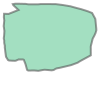

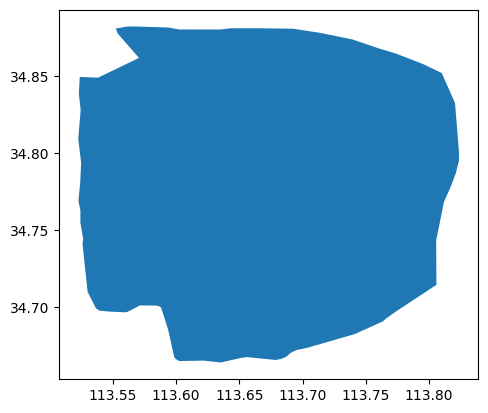

In [5]:
#读取行政区划shapefile文件
sz = gpd.GeoDataFrame.from_file(r'D:\新建文件夹\手机信令数据处理\原始数据\郑州市四环边界线.shp',encoding = 'utf-8')
#用GeoDataFrame自带的plot函数，绘制sz
sz.plot()
#整体合并后的地图显示
sz.unary_union

## 栅格化

In [9]:
#栅格化代码
import math
#定义一个测试栅格划的经纬度
testlon = 113.6
testlat = 34.7

#划定郑州市栅格划分范围
lon1 = 113.522585
lon2 = 113.823666
lat1 = 34.664081
lat2 = 34.882341

#研究范围的经纬度最小值
latStart = min(lat1, lat2);
lonStart = min(lon1, lon2);

#定义栅格大小(单位m)
accuracy = 100;

#计算栅格的经纬度增加量大小▲Lon和▲Lat
deltaLon = accuracy * 360 / (2 * math.pi * 6371004 * math.cos((lat1 + lat2) * math.pi / 360));
deltaLat = accuracy * 360 / (2 * math.pi * 6371004);

#计算栅格的经纬度编号
LONCOL=divmod(float(testlon) - (lonStart - deltaLon / 2) , deltaLon)[0]
LATCOL=divmod(float(testlat) - (latStart - deltaLat / 2) , deltaLat)[0]

#计算栅格的中心点经纬度
HBLON = LONCOL*deltaLon + lonStart #格子编号*格子宽+起始横坐标=格子中心横坐标
HBLAT = LATCOL*deltaLat + latStart 

LONCOL,LATCOL,HBLON,HBLAT,deltaLon,deltaLat
#该栅格的经纬度范围,即用中心点经纬度加减1/2的delta增加量
HBLON - deltaLon/2,HBLON + deltaLon/2,HBLAT - deltaLat/2,HBLAT + deltaLon/2

(113.59977139093093,
 113.60086623335548,
 34.699604181130745,
 34.700601262863664)

C:\Users\35333\AppData\Local\Temp\ipykernel_6428\226412952.py:51: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  data['geometry'] = geometry
C:\Users\35333\AppData\Local\Temp\ipykernel_6428\226412952.py:54: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid_sz = data[data.intersects(sz.unary_union)]


<Axes: >

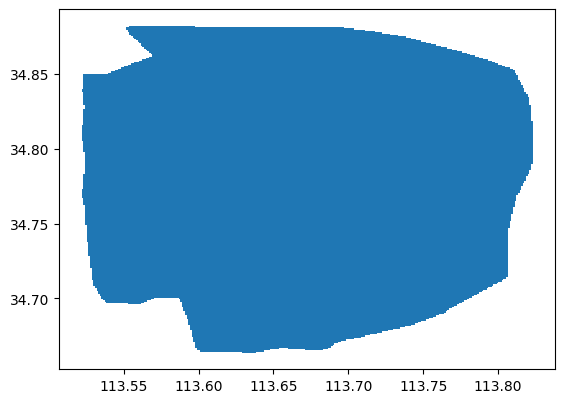

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
from shapely.geohash7 import Point,Polygon,shape


#定义空的geopandas表
data = geopandas.GeoDataFrame()

#定义空的list，后面循环一次就往里面加东西 
LONCOL = []
LATCOL = []
geohash7 = []
HBLON1 = []
HBLAT1 = []

#计算总共要生成多少个栅格
#lon方向是lonsnum个栅格
lonsnum = int((lon2-lon1)/deltaLon)+1
#lat方向是latsnum个栅格
latsnum = int((lat2-lat1)/deltaLat)+1

for i in range(lonsnum):
    for j in range(latsnum):

        HBLON = i*deltaLon + lonStart 
        HBLAT = j*deltaLat + latStart
        #把生成的数据都加入到前面定义的空list里面
        LONCOL.append(i)
        LATCOL.append(j)
        HBLON1.append(HBLON)
        HBLAT1.append(HBLAT)
        
        #生成栅格的Polygon形状
        #这里我们用周围的栅格推算三个顶点的位置，否则生成的栅格因为小数点取值的问题会出现小缝，无法完美覆盖
        HBLON_1 = (i+1)*deltaLon + lonStart
        HBLAT_1 = (j+1)*deltaLat + latStart 
        geohash7.append(Polygon([
        (HBLON-deltaLon/2,HBLAT-deltaLat/2),
        (HBLON_1-deltaLon/2,HBLAT-deltaLat/2),
        (HBLON_1-deltaLon/2,HBLAT_1-deltaLat/2),
        (HBLON-deltaLon/2,HBLAT_1-deltaLat/2)]))
        
#为geopandas文件的每一列赋值为刚刚的list
data['LONCOL'] = LONCOL
data['LATCOL'] = LATCOL
data['HBLON'] = HBLON1
data['HBLAT'] = HBLAT1
data['geohash7'] = geohash7

#筛选出郑州市范围的栅格，使用intersects语句
grid_sz = data[data.intersects(sz.unary_union)]
grid_sz.plot()

## 筛选在栅格内的OD

In [6]:
#读取数据
import pandas as pd
oddata = pd.read_csv(r'D:\新建文件夹\手机信令数据处理\结果文件\11日_早晚高峰.csv')
oddata.head(5)

,date_dt,time_,o_grid,d_grid,num_freq,num_freq_total,O_long,O_lat,D_long,D_lat
0,20191211,7,4330,43729,1,3,113.649697,34.786273,113.726952,34.773729
1,20191211,7,4330,50381,1,3,113.649697,34.786273,113.752105,34.718369
2,20191211,7,6103,46698,1,3,113.638019,34.767088,113.788037,34.826840
3,20191211,7,6345,29080,1,3,113.768274,34.843799,113.531119,34.834214
4,20191211,7,6699,45502,1,3,113.650595,34.762660,113.641612,34.788486


In [ ]:
# 删除包含NaN的行
oddata = oddata.dropna()
#计算od起/终点所属的栅格编号
oddata['SLONCOL'] = ((oddata['O_long']-(lonStart - deltaLon / 2))/deltaLon).astype('int')
oddata['SLATCOL'] = ((oddata['O_lat']-(latStart - deltaLat / 2))/deltaLat).astype('int')

oddata['ELONCOL'] = ((oddata['D_long']-(lonStart - deltaLon / 2))/deltaLon).astype('int')
oddata['ELATCOL'] = ((oddata['D_lat']-(latStart - deltaLat / 2))/deltaLat).astype('int')

#集计
oddata = oddata.groupby(['SLONCOL','SLATCOL','ELONCOL','ELATCOL'])['num_freq'].count().rename('count').reset_index()
oddata.head(5)


,SLONCOL,SLATCOL,ELONCOL,ELATCOL,count
0,0,161,11,151,1
1,0,161,18,162,1
2,0,161,66,166,1
3,0,161,78,221,1
4,0,161,164,216,1
...,...,...,...,...,...
236640,275,150,41,139,1
236641,275,150,42,159,1
236642,275,150,132,154,1
236643,275,150,134,235,1


In [ ]:
#筛选范围内的栅格
oddata = oddata[(oddata['SLONCOL']>=0) & (oddata['SLONCOL']<=lonsnum)&\
(oddata['SLATCOL']>=0) & (oddata['SLATCOL']<=latsnum)&\
(oddata['ELONCOL']>=0) & (oddata['ELONCOL']<=lonsnum)&\
(oddata['ELATCOL']>=0) & (oddata['ELATCOL']<=latsnum)]
#计算栅格的中心点经纬度
oddata['SHBLON'] = oddata['SLONCOL']*deltaLon + lonStart#格子编号*格子宽+起始横坐标=格子中心横坐标
oddata['SHBLAT'] = oddata['SLATCOL']*deltaLat + latStart

oddata['EHBLON'] = oddata['ELONCOL']*deltaLon + lonStart#格子编号*格子宽+起始横坐标=格子中心横坐标
oddata['EHBLAT'] = oddata['ELATCOL']*deltaLat + latStart
oddata.head(5)

,SLONCOL,SLATCOL,ELONCOL,ELATCOL,count,SHBLON,SHBLAT,EHBLON,EHBLAT
0,0,161,11,151,1,113.522585,34.808872,113.534628,34.799878
1,0,161,18,162,1,113.522585,34.808872,113.542292,34.809771
2,0,161,66,166,1,113.522585,34.808872,113.594845,34.813368
3,0,161,78,221,1,113.522585,34.808872,113.607983,34.862831
4,0,161,164,216,1,113.522585,34.808872,113.702139,34.858334
...,...,...,...,...,...,...,...,...,...
236640,275,150,41,139,1,113.823667,34.798979,113.567474,34.789087
236641,275,150,42,159,1,113.823667,34.798979,113.568568,34.807073
236642,275,150,132,154,1,113.823667,34.798979,113.667104,34.802576
236643,275,150,134,235,1,113.823667,34.798979,113.669294,34.875421


## 绘制行政区划和栅格底图

C:\Users\35333\AppData\Local\Temp\ipykernel_6428\580444653.py:11: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sz_all['geometry'] = [sz.unary_union]
C:\Users\35333\AppData\Local\Temp\ipykernel_6428\580444653.py:11: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sz_all['geometry'] = [sz.unary_union]


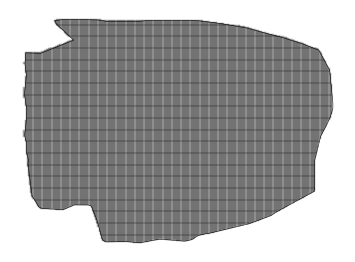

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(1,(8,4),dpi = 80)
ax = plt.subplot(111)
plt.sca(ax)

#绘制栅格
grid_sz.plot(ax = ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)

#绘制郑州市的边界
sz_all = geopandas.GeoDataFrame()
sz_all['geohash7'] = [sz.unary_union]
sz_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

#不显示边框
plt.axis('off')
#显示图
plt.show()

## 绘制OD

In [20]:
#需要排序以保证小的od先绘制
oddata = oddata.sort_values(by = 'count')

### 方法1，遍历绘制

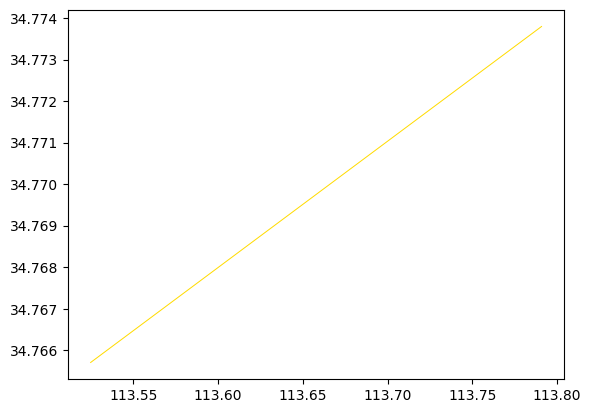

In [21]:
#设置colormap的数据
import matplotlib
import matplotlib.pyplot as plt  # 导入 pyplot 模块
vmax = oddata['count'].max()
#设定一个标准化的工具，设定OD的colormap最大最小值，他的作用是norm(count)就会将count标准化到0-1的范围内
norm = matplotlib.colors.Normalize(vmin=0,vmax=vmax)
#设定colormap的颜色
cmapname = 'autumn_r'
#cmap是一个获取颜色的工具，cmap(a)会返回颜色，其中a是0-1之间的值
cmap = plt.get_cmap(cmapname)
#绘制第一条OD
r = oddata.iloc[i]
count = r['count']
linewidth = 5*(count/oddata['count'].max())
plt.plot([r['SHBLON'],r['EHBLON']],[r['SHBLAT'],r['EHBLAT']],linewidth = linewidth,color = cmap(norm(count)))

C:\Users\35333\AppData\Local\Temp\ipykernel_6428\2785162996.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sz_all['geometry'] = [sz.unary_union]
C:\Users\35333\AppData\Local\Temp\ipykernel_6428\2785162996.py:13: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sz_all['geometry'] = [sz.unary_union]


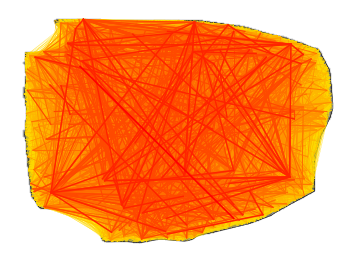

In [ ]:
#绘制
#创建图框
import matplotlib.pyplot as plt
fig = plt.figure(1,(8,4),dpi = 80)
ax = plt.subplot(111)
plt.sca(ax)

#绘制栅格
grid_sz.plot(ax = ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)

#绘制郑州市的边界
sz_all = geopandas.GeoDataFrame()
sz_all['geohash7'] = [sz.unary_union]
sz_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

#设置colormap的数据
import matplotlib
vmax = oddata['count'].max()
#设定一个标准化的工具，设定OD的colormap最大最小值，他的作用是norm(count)就会将count标准化到0-1的范围内
norm = matplotlib.colors.Normalize(vmin=0,vmax=vmax)
#设定colormap的颜色
cmapname = 'autumn_r'
#cmap是一个获取颜色的工具，cmap(a)会返回颜色，其中a是0-1之间的值
cmap = plt.get_cmap(cmapname)

#遍历绘制OD
for i in range(len(oddata)):
    r = oddata.iloc[i]
    count = r['count']
    linewidth = 1.5*(count/oddata['count'].max())
    plt.plot([r['SHBLON'],r['EHBLON']],[r['SHBLAT'],r['EHBLAT']],linewidth = linewidth,color = cmap(norm(count)))

#不显示边框
plt.axis('off')
#显示图
plt.show()

### 方法2，转换geopandas进行绘制

C:\Users\35333\AppData\Local\Temp\ipykernel_6428\3679818628.py:5: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  oddata['geometry']=oddata.apply(lambda r:LineString([[r['SHBLON'],r['SHBLAT']],[r['EHBLON'],r['EHBLAT']]]),axis = 1)


<Axes: >

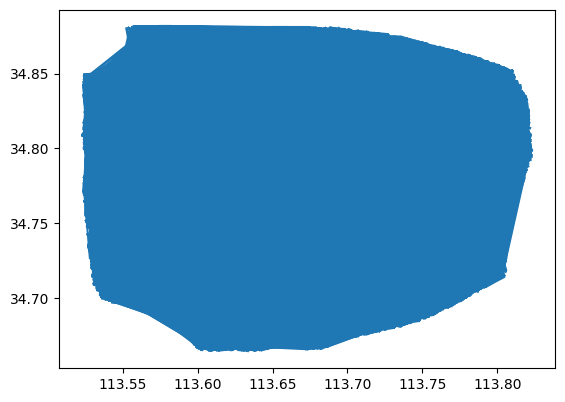

In [ ]:
#将oddata转换为geodataframe，并生成geohash7
oddata = geopandas.GeoDataFrame(oddata)
from shapely.geohash7 import LineString
r = oddata.iloc[0]
oddata['geohash7']=oddata.apply(lambda r:LineString([[r['SHBLON'],r['SHBLAT']],[r['EHBLON'],r['EHBLAT']]]),axis = 1)
oddata.plot()

C:\Users\35333\AppData\Local\Temp\ipykernel_6428\3380412290.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sz_all['geometry'] = [sz.unary_union]
C:\Users\35333\AppData\Local\Temp\ipykernel_6428\3380412290.py:13: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sz_all['geometry'] = [sz.unary_union]


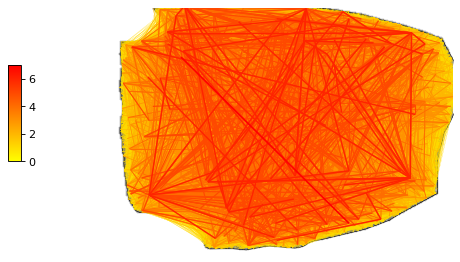

In [ ]:
#绘制
#创建图框
import matplotlib.pyplot as plt
fig = plt.figure(1,(8,4),dpi = 80)
ax = plt.subplot(111)
plt.sca(ax)

#绘制栅格
grid_sz.plot(ax = ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)

#绘制郑州市的边界
sz_all = geopandas.GeoDataFrame()
sz_all['geohash7'] = [sz.unary_union]
sz_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

#设置colormap的数据
import matplotlib
vmax = oddata['count'].max()
cmapname = 'autumn_r'
cmap = plt.get_cmap(cmapname)

#绘制OD
oddata.plot(ax = ax,column = 'count',linewidth = 1.5*(oddata['count']/oddata['count'].max()),cmap = cmap,vmin = 0,vmax = vmax)
plt.axis('off')

#设定显示范围
ax.set_xlim(113.52,113.82)
ax.set_ylim(34.66,34.88)

#绘制colorbar
plt.imshow([[0,vmax]], cmap=cmap)
cax = plt.axes([0.08, 0.4, 0.02, 0.3])
plt.colorbar(cax=cax)

#显示图
plt.show()